In [66]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio

<hr>

Consider sampling the function $f(t)=sin(2\pi(440)t)$ on the inteval $0 \leq t \lt 1$, at 8192 points (sampling interval $\Delta T=1/8192$) to obtain samples $f_k=f(k\Delta T)=sin(2\pi(440)k/8192)$ for $0 \leq k \leq 8191$.

In [98]:
t = np.linspace(start=0, stop=1, num=8192, endpoint=False)
f = np.sin(2*np.pi*440*t)

<hr>

a) What is the frequency of the sine wave $sin(2\pi(440)t)$, in hertz?

<hr>

b) Plot the sampled signal with the command plot. It probability does not look too good, as it goes up an down 440 times in the plot range. You can plot a smaller range, say the first 100 samples.

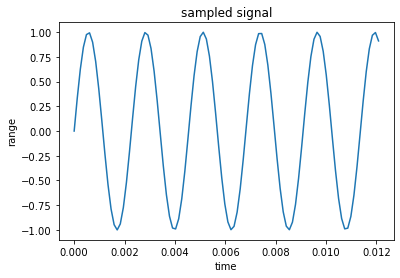

In [99]:
plt.plot(t[0:100], f[0:100])
plt.title('sampled signal')
plt.xlabel('time')
plt.ylabel('range')
plt.show()

<hr>

c) At the sampling rate 8192 Hz, what is the Nyquist frequency? Is the frequency of $f(t)$ above or below the Nyquist frequency?

Nyquist frequency is 4096Hz. The frequency of $f(t)$ is 440Hz, above the Nyquist frequency

<hr>

d) Type Audio() to play the sound out of the computer speaker.

In [100]:
Audio(f, rate=8192)

<hr>

e) As an example of aliasing, consider a second signal $g(t)=sin(2\pi(440+8192)t)$. Repeat parts (a) through (d) with the sampled signal

In [101]:
g = np.sin(2*np.pi*(440+8192)*t)

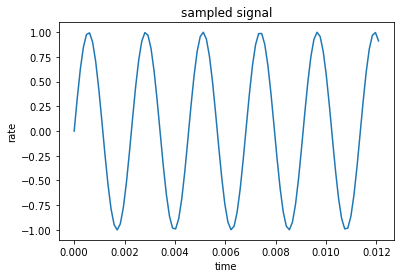

In [102]:
plt.plot(t[0:100], g[0:100])
plt.title('sampled signal')
plt.xlabel('time')
plt.ylabel('rate')
plt.show()

In [103]:
Audio(g, rate=8192)

The analog signal $g(t)$ oscillates much faster than $f(t)$, and we could expect it to yield a higher pitch. However, when sampled at frequency 8192Hz, $f(t)$ and $g(t)$ are aliased and yield precisely the same sampled vector. They should sound the same too.

<hr>

f) To illustrate the effect of quantization error, let us construct a 2-bit (four quantization levels) version of audio signal $f(t)$ as in the scheme of Example 1.26. With that notation, we have minimum value $m=-1$ and maximum value $M=1$ for our signal, with $r=4$. The command

In [104]:
qf = np.ceil(2*(f+1))-1

produces the quantized signal $q(f)$. Sample values of $f(t)$ in the ranges $(-1, -0.5]$, $(-0.5, 0]$, $(0, 0.5]$ and $(0.5, 1]$ are mapped to the integers 0, 1, 2 and 3 respectively. To approximately reconstruct the quantized signal, we apply the dequantization formula to construct f as

In [105]:
ftilde = -1 + 0.5*(qf + 0.5)

this maps the integers 0, 1, 2 and 3 to values -0.75, -0.25, 0.25 and 0.75, respectively (the codewords in this scheme).

In [106]:
f = np.sin(2*np.pi*440*t)
f

array([ 0.        ,  0.33110631,  0.62485949, ..., -0.84812034,
       -0.62485949, -0.33110631])

In [107]:
qf = np.ceil(2*(f+1))-1
qf

array([1., 2., 3., ..., 0., 0., 1.])

In [108]:
ftilde = -1 + 0.5*(qf + 0.5)
ftilde

array([-0.25,  0.25,  0.75, ..., -0.75, -0.75, -0.25])

g) Plot the first hundred values of ftilde. Play the quantized signal

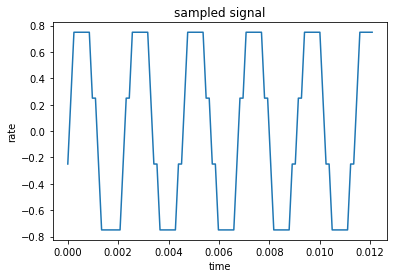

In [117]:
plt.plot(t[0:100], ftilde[0:100])
plt.title('sampled signal')
plt.xlabel('time')
plt.ylabel('rate')
plt.show()

In [119]:
Audio(ftilde, rate=8192)

<hr>